## Part 1: Logistic Regression - Binary Classification

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [2]:
import spacy
nlp = spacy.load('fr_core_news_sm')

In [4]:
data = pd.read_csv('C:/Users/Joseph Moussa/Desktop/X/2A/PSC/TweetDatabase.csv')

In [5]:
df = data[['Tweet', 'Political']]
df = df.dropna()
df.groupby(['Political']).describe()

Tweet                                                               
          count unique                                                top freq
Political                                                                     
0.0         181    180  "Les Lions Indomptables exhortent les fans de ...    2
1.0         882    864                                     #Melenchon2022    3

In [6]:
X = []
for tweet in df['Tweet']:
    tweet = nlp(tweet).vector
    X.append(tweet)

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, df['Political'], test_size = 0.2, random_state = 1)

In [8]:
# Let us check the best parameter C for our logistic regression
from sklearn.model_selection import GridSearchCV

parameters = {'C':[0.1, 0.2, 0.3, 0.4, 0.5, 1, 2, 3, 5, 10, 20, 100, 1000]}
log_reg_model = LogisticRegression(solver = 'lbfgs', max_iter = 1000)
cv = GridSearchCV(log_reg_model, parameters)
cv.fit(X_train, Y_train)
cv.best_params_

{'C': 0.1}

In [9]:
model = LogisticRegression(solver = 'lbfgs', max_iter = 1000, C = 0.1, class_weight = {0:0.7, 1:0.3})
model.fit(X_train, Y_train)
def simple_logistic_classify(X_test, Y_test):
    score = model.score(X_test, Y_test)
    print('The model score is: {0}%'.format(score*100))

In [10]:
simple_logistic_classify(X_test, Y_test)

The model score is: 88.26291079812206%


Accuracy Score: 0.8826291079812206


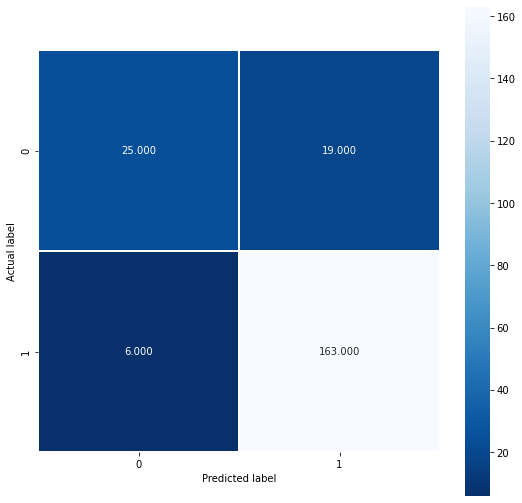

In [11]:
predictions = model.predict(X_test)
cm = metrics.confusion_matrix(Y_test, predictions)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(model.score(X_test, Y_test))
print(all_sample_title)

## Part 2: Logistic Regression - MultiClass Classification

In [12]:
data = pd.read_csv('C:/Users/Joseph Moussa/Desktop/X/2A/PSC/TweetDatabase.csv')

In [13]:
df = data[['Tweet', 'Score Vector [Far Right, Right, Center, Left, Far Left]']]
df = df.dropna()
df.groupby(['Score Vector [Far Right, Right, Center, Left, Far Left]']).describe()

Tweet         \
                                                   count unique   
Score Vector [Far Right, Right, Center, Left, F...                
[0,0,0,0,1]                                          177    172   
[0,0,0,1,0]                                          175    173   
[0,0,1,0,0]                                          176    171   
[0,1,0,0,0]                                          178    175   
[1,0,0,0,0]                                          176    173   

                                                                                                       \
                                                                                                  top   
Score Vector [Far Right, Right, Center, Left, F...                                                      
[0,0,0,0,1]                                                                            #Melenchon2022   
[0,0,0,1,0]                                                                        #HidalgoPresidente   
[0,0,1,0,0]                                         Christian Schotettl, maire de Janvry, sur l'ai...   
[0,1,0,0,0]                                         Il était de Grenoble. Il était de notre région...   
[1,0,0,0,0]                                                                                    #Z2022   

                                                         
                                                   freq  
Score Vector [Far Right, Right, Center, Left, F...       
[0,0,0,0,1]                                           3  
[0,0,0,1,0]                                           2  
[0,0,1,0,0]                                           2  
[0,1,0,0,0]                                           2  
[1,0,0,0,0]                                           2

In [14]:
X = []
for tweet in df['Tweet']:
    tweet = nlp(tweet).vector
    X.append(tweet)

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, df['Score Vector [Far Right, Right, Center, Left, Far Left]'], test_size = 0.2, random_state = 1)

In [16]:
# Let us check the best parameter C for our logistic regression
from sklearn.model_selection import GridSearchCV

parameters = {'C':[0.1, 0.2, 0.3, 0.4, 0.5, 1, 2, 3, 5, 10, 20, 100, 1000]}
log_reg_model = LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs', warm_start = False, max_iter = 100000)
cv = GridSearchCV(log_reg_model, parameters)
cv.fit(X_train, Y_train)
cv.best_params_

{'C': 0.1}

In [99]:
model_2 = LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs', warm_start = False, max_iter = 100000, C = 0.35)
model_2.fit(X_train, Y_train)
def multi_logistic_classify(X_test, Y_test):
    score = model_2.score(X_test, Y_test)
    print('The model score is: {0}%'.format(score*100))

Accuracy Score: 0.3389830508474576


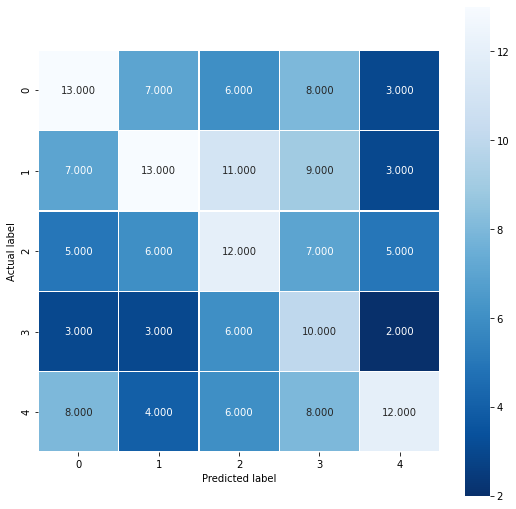

In [100]:
predictions = model_2.predict(X_test)
cm = metrics.confusion_matrix(Y_test, predictions)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(model_2.score(X_test, Y_test))
print(all_sample_title)

## Part 3: Twitter Scraping

In [101]:
import os
import tweepy as tw
import pandas as pd
from credentials import *
import numpy as np  
from tqdm.notebook import tqdm

consumer_key= 'GoN90XkTehFV4lNMk1Whk8JYe'
consumer_secret= 'WCpGzX2T67hAF56EU1qdAFo0lO5EoIv7fgrEoNtwa8dvv1fuLz'
access_token= '1417219540904259594-CdqMIpFBK10mF7eY9l2LRBNW1PbD53'
access_token_secret= 'G1P2vYYXB3BeShIG5fvPEgYMFpY5sB0LMfS5mfHk2yLz9'
#bnerbflerf nblcwebfle
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [102]:
tweet_dataset = pd.DataFrame(columns=["tweet_id",'user_id', "created_at","favorite_count","retweet", "text","categorie"])
user_dataset = pd.DataFrame(columns=['User Id', 'Tweet Number', 'Categorie'])

In [103]:
userIDdepart = "EmmanuelMacron"
# Setting the depth level n 
n = 2
def est_dans(userID):
    for name in user_dataset["User Id"]:
        if userID == name:
            return True
    return False

In [104]:
def get_tweets(userID):
    global user_dataset
    tweets = api.user_timeline(screen_name=userID, 
                           # 200 is the maximum allowed count
                           count = 10,
                           include_rts = False,
                           # Necessary to keep full_text 
                           # otherwise only the first 140 words are extracted
                           tweet_mode = 'extended'
                           )

    all_tweets = []
    all_tweets.extend(tweets)
    oldest_id = tweets[-1].id
    i = 1
    while i > 0:
        tweets = api.user_timeline(screen_name=userID, 
                           # 200 is the maximum allowed count
                           count = 10,
                           include_rts = False, #to keep full text
                           max_id = oldest_id - 1,
                           tweet_mode = 'extended'
                           )
        if len(tweets) == 0:
            break
        oldest_id = tweets[-1].id
        all_tweets.extend(tweets)
        i = i-1

    outtweets = [[tweet.id_str, userID,  
                  tweet.created_at, 
                  tweet.favorite_count, 
                  [], 
                  tweet.full_text.encode("utf-8").decode("utf-8"),[0,0,0,0,0]] 
                 for idx,tweet in enumerate(all_tweets)]
    df = pd.DataFrame(outtweets,columns=["tweet_id",'user_id', "created_at","favorite_count","retweet", "text","categorie"])
    # If we want to change columns' names, change the index of df
    # Update user dataframe with new user info
    user_dataset = user_dataset.append({'User Id': userID, 'Tweet Number': len(df.index),'Categorie':[0,0,0,0,0]}, ignore_index=True)

    
    return df

In [105]:
def get_tweets_global(n,userID):
    
    if n == 0 or est_dans(userID):
        return tweet_dataset.loc[tweet_dataset['user_id'] == userID]
    
    df = get_tweets(userID)
    
    
    for row in tqdm(df.index, desc = "Total Progress: "):
        
        ID = df['tweet_id'][row]
        tweet = str(df['text'][row])
        
        if (model.predict([nlp(tweet).vector]) == 0):
            df.drop([row], inplace = True)
            
        else:
            
            prediction = model_2.predict([nlp(tweet).vector])
            df.at[row,'categorie'] = prediction
            retweets_list = api.get_retweets(ID,count=5) 
            
            for retweet in retweets_list:
                try:
                    get_tweets_global(n-1,retweet.user.screen_name)
                    df.at[row, 'retweet'].append(retweet.user.screen_name) 
                    
                except:
                    break
        df = df.dropna(axis = 0)
                    
    return df.loc[df['user_id'] == userID]

In [106]:
def compute_mean_political_score(user_ID):
    df_user = get_tweets_global(1, user_ID)
    N = len(df_user.index)
    
    extreme_right = 0
    right = 0
    center = 0
    left = 0
    extreme_left = 0
    
    for row in df_user.index:
        if df_user['categorie'][row][0] == '[1,0,0,0,0]':
            extreme_right += 1
        if df_user['categorie'][row][0] == '[0,1,0,0,0]':
            right +=1
        if df_user['categorie'][row][0] == '[0,0,1,0,0]':
            center +=1
        if df_user['categorie'][row][0] == '[0,0,0,1,0]':
            left +=1
        if df_user['categorie'][row][0] == '[0,0,0,0,1]':
            extreme_left += 1
    
    return [extreme_right / N, right / N, center / N, left / N, extreme_left / N]

In [ ]:
for e in ["ZemmourEric", "EmmanuelMacron", "JLMelenchon", "MLP_officiel", "Anne_Hidalgo"]:
    print("Pour {0} le score est: {1} ".format(e, compute_mean_political_score(e)))

Total Progress:   0%|          | 0/18 [00:00<?, ?it/s]

Pour ZemmourEric le score est: [0.06666666666666667, 0.4, 0.13333333333333333, 0.2, 0.2] 


Total Progress:   0%|          | 0/20 [00:00<?, ?it/s]

Pour EmmanuelMacron le score est: [0.1875, 0.5, 0.1875, 0.0625, 0.0625] 


Total Progress:   0%|          | 0/19 [00:00<?, ?it/s]

Pour JLMelenchon le score est: [0.1111111111111111, 0.1111111111111111, 0.3888888888888889, 0.05555555555555555, 0.3333333333333333] 


Total Progress:   0%|          | 0/19 [00:00<?, ?it/s]

Pour MLP_officiel le score est: [0.05555555555555555, 0.4444444444444444, 0.1111111111111111, 0.1111111111111111, 0.2777777777777778] 


Total Progress:   0%|          | 0/15 [00:00<?, ?it/s]

Rate limit reached. Sleeping for: 868
